## Marciniak, Duncan, and Hu (2002): _Mechanics of Sheet Metal Forming_.
### Exercise 3.3.

In a deep-drawn cup as shown in Figure 3.2, the strains in the centre of the base,
(a), half-way up the cup wall, (b), and in the middle of the flange,(c), are as follows: (a)
0.015, 0.015, (b) 0.050, 0.000, and (c) 0.150, −0.100. Strain-hardening in the material
is negligible so that the effective stress is constant at 300 MPa. The initial thickness is
0.50 mm. Determine at each point, the thickness and the major tension (acting along the
line shown in the sectioning plane).

<img src="marciniak_ex3_3.png" alt="drawing" width="400"/>

Figure 3.2. (a) Deep drawing a cylindrical cup. (b) Sector of a cup showing the location of strain
measurements. (c) Strain plots for two stages in the drawing process.

### Solutions

The sheet thickness is found from:
$$
\varepsilon_3 = \ln\frac{t}{t_0} = -(1+\beta)\varepsilon_1 \qquad\rightarrow\qquad
t = t_0 \exp{(\varepsilon_3)}
$$

The major tension is found from $T_1 = \sigma_1\,t$ where the major stress is found from:
$$
\beta=\frac{\varepsilon_2}{\varepsilon_1} \qquad\rightarrow\qquad
\alpha=\frac{2\beta+1}{2+\beta} \qquad\rightarrow\qquad
\overline\sigma = \sigma_1\sqrt{1-\alpha+\alpha^2} = 300\text{ MPa} \qquad\rightarrow\qquad 
\sigma_1 = \frac{\overline\sigma}{\sqrt{1-\alpha+\alpha^2}}
$$

It is useful to use the following table:

|  | $\varepsilon_1$ | $\varepsilon_2$ | $\varepsilon_3$ | $t$ | $\beta$ | $\alpha$ | $\sigma_1$ | $T_1$ |
| :--- | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| (a) centre of the base       | 0.015 | 0.015  | | | | | | |
| (b) half-way up the cup wall | 0.050 | 0.000  | | | | | | |
| (c) middle of the flange     | 0.150 | -0.100 | | | | | | |





### Example with Python

In [1]:
e1 = [0.015, 0.050, 0.150]
e2 = [0.015, 0.000, -0.100]
sy = 300
t0 = 0.5

import math
variables = []
for i in range(len(e1)):    
    e3 = -(e1[i]+e2[i])
    t = t0*math.exp(e3)
    b = e2[i]/e1[i]
    a = (2*b+1)/(2+b)
    s1 = sy/math.sqrt(1-a+a**2)
    T1 = s1*t
    print('(%s) e3=%0.3f, t=%0.3f mm, beta=%0.3f, alpha=%0.3f, s1=%0.1f MPa, T1=%0.0f kN/m' % (i+1, e3, t, b, a, s1, T1))
    variables.append([e3, t, b, a, s1, T1])

(1) e3=-0.030, t=0.485 mm, beta=1.000, alpha=1.000, s1=300.0 MPa, T1=146 kN/m
(2) e3=-0.050, t=0.476 mm, beta=0.000, alpha=0.500, s1=346.4 MPa, T1=165 kN/m
(3) e3=-0.050, t=0.476 mm, beta=-0.667, alpha=-0.250, s1=261.9 MPa, T1=125 kN/m


|  | $\varepsilon_1$ | $\varepsilon_2$ | $\varepsilon_3$ | $t$ (mm) | $\beta$ | $\alpha$ | $\sigma_1$ (MPa) | $T_1$ (kN/m) |
| :--- | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| (a) centre of the base       | 0.015 | 0.015  | -0.03 | 0.485 | 1 | 1 | 300.0 | 146 |
| (b) half-way up the cup wall | 0.050 | 0.000  | -0.05 | 0.476 | 0 | 0.5 | 346.4 | 165 |
| (c) middle of the flange     | 0.150 | -0.100 | -0.05 | 0.476 | -0.667 | -0.25 | 261.9 | 125 |

### Analysis in strain space

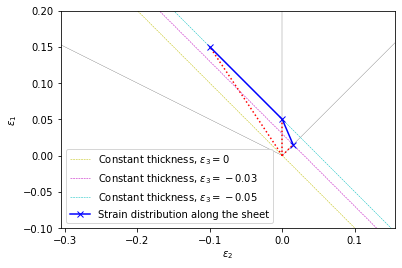

In [2]:
e3, t, b, a, s1, T1 = zip(*variables)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot([0,-2], [0,1], 'k-', linewidth=0.2)
ax.plot([0,0], [0,1], 'k-', linewidth=0.2)
ax.plot([0,1], [0,1], 'k-', linewidth=0.2)
y = [i-0.5 for i in range(50)]
x = [-(i) for i in y]
ax.plot(x, y, 'y--', linewidth=0.5, label=r'Constant thickness, $\varepsilon_3=0$')
x = [-(i+e3[0]) for i in y]
ax.plot(x, y, 'm--', linewidth=0.5, label=r'Constant thickness, $\varepsilon_3=%0.2f$' %e3[0])
x = [-(i+e3[1]) for i in y]
ax.plot(x, y, 'c--', linewidth=0.5, label=r'Constant thickness, $\varepsilon_3=%0.2f$' %e3[1])
distr = []
for i in range(len(e1)):
    ax.plot([0, e2[i]], [0, e1[i]], 'r:')
    distr.append([e2[i], e1[i]])
x, y = zip(*distr)
ax.plot(x, y, 'bx-', label='Strain distribution along the sheet')
ax.axis([-0.2, 0.05, -0.1, 0.2])
ax.set_xlabel(r'$\varepsilon_2$')
ax.set_ylabel(r'$\varepsilon_1$')
ax.set_aspect('equal', adjustable='datalim')
plt.legend(loc='lower left')
plt.show()

### Analysis in stress space

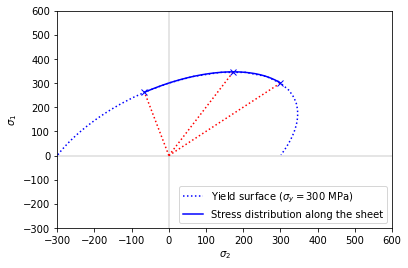

In [3]:
# yield surface
a0 = [200*i/1000-100 for i in range(1000)]
y0 = [sy/(math.sqrt(1-i+i**2)) for i in a0]
x0 = [j*i for i,j in zip(y0,a0)]
af = [(max(a)-min(a))*i/1000+min(a) for i in range(1000)]
yf = [sy/(math.sqrt(1-i+i**2)) for i in af]
xf = [j*i for i,j in zip(yf,af)]

fig, ax = plt.subplots()
ax.axvline(x=0, color='k', linewidth=0.2)
ax.axhline(y=0, color='k', linewidth=0.2)
ax.plot(x0,y0, 'b:', label=r'Yield surface ($\sigma_y=%s$ MPa)' % sy)
distr = []
for i in range(len(e1)):
    ax.plot([0, a[i]*s1[i]], [0, s1[i]], 'r:')
    distr.append([a[i]*s1[i], s1[i]])
x, y = zip(*distr)
ax.plot(xf,yf, 'b-', label='Stress distribution along the sheet')
ax.plot(x, y, 'bx',)
ax.axis([-300, 600, -300, 600])
ax.set_xlabel(r'$\sigma_2$')
ax.set_ylabel(r'$\sigma_1$')
plt.legend(loc='lower right')
plt.show()